#### Welcome to this data science project.
The goal of this project is to create a linear regression model that will predict waiter tips utilizing the tips data set from the seaborn package.

#### Load the libraries

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Load the dataset

In [195]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### The following objectives will guide this data analysis project. 
1. To perform exploratory data analysis (EDA) on the dataset
2. To examine the tips given to the waiters based on the following:total bill paid and the day of the week.
3. To assess the tips given to the waiters based on the total bill paid and the number of people at a table.
4. To determine the tips given to the waiters based on the total bill paid and sex of customers.
5. To examine the tips given to the waiters based on the total bill and time of the meal.
6. To examine the tips given to the waiters based on the total bill and smooking status.
7. To find the percentage tip for each total bill paid
8. To find the tips each according to day, sex, smoking status, and time.
9. To develop waiter tips prediction model that will make predictions based on 


#### 1. Exploratory Data Analysis

In [196]:
# data preprocessing and cleaning
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [197]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [198]:
tips.shape

(244, 7)

In [199]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Insights:
1. The dataset for this project consists of 244 rows and 7 columns.
2. Total bill: 
    - The mean total bill is approximately $19.79 with a standard deviation of 8.90. 
    - The 25th percentile for the total bill is 13.34, the 50th percentile equals 17.80, and the 75th precentile is 24.13.
3. The mean tip is approximately 3.0 with a standard deviation of 1.38.
    - The 25th percentile for the tip is 2.00, the 50th percentile equal 2.90, and the 75th percentile is 3.56
4. The mean size (number of people at a table) is approximately 3.0 with a standard deviation of 0.95.
    - The 25th percentile is 2.00, the 50th percentile is 2.00, and the 75th percentile is 3.00 respectively.
Overall, the total bill has more variability than tip and size.


#### 2. To examine the tips given to the waiters based on the following:total bill paid, number of people at a table, and the day of the week when the tips was made

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

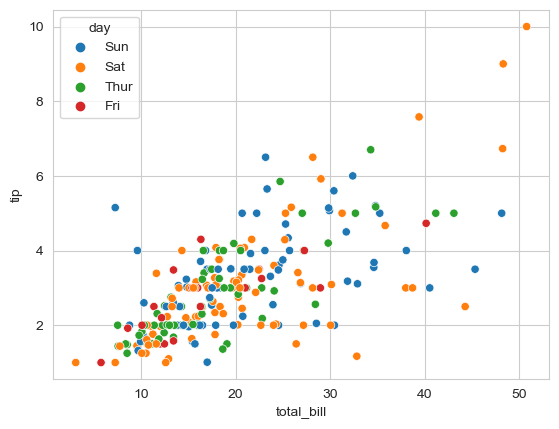

In [200]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day')

#### 3.To assess the tips given to the waiters based on the total bill paid and the number of people at a table.

Text(0.5, 1.0, 'Tips according to total bill categorized by size')

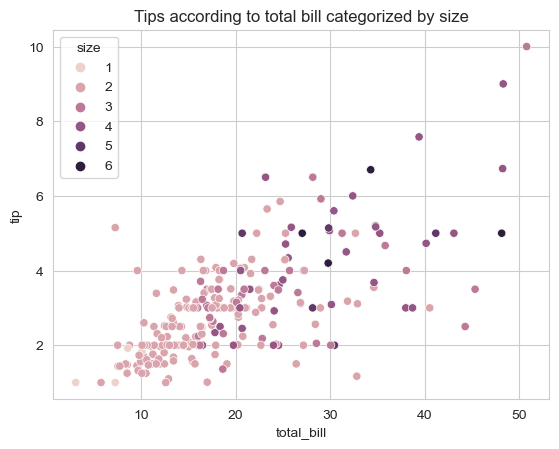

In [201]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size')
plt.title('Tips according to total bill categorized by size')

#### 4. To determine the tips given to the waiters based on the total bill paid and sex of customers.

Text(0.5, 1.0, 'Tips according to total bills classified by sex')

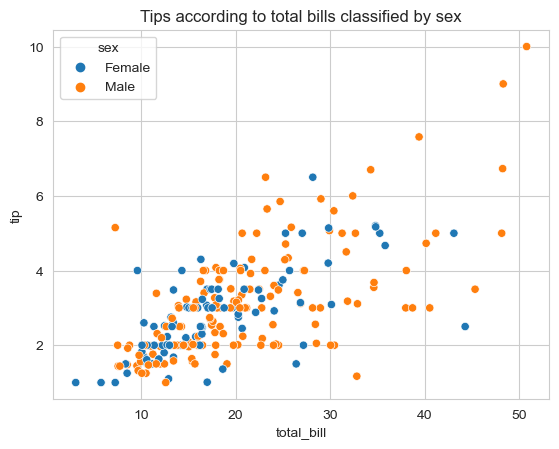

In [202]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.title('Tips according to total bills classified by sex')

('total_bill', 'tip')

<Figure size 1000x500 with 0 Axes>

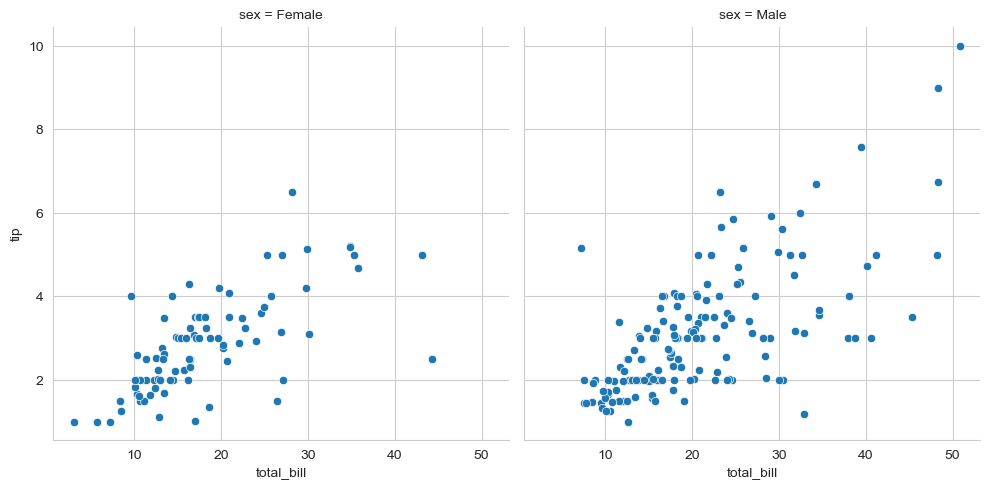

In [203]:
plt.figure(figsize=(10, 5))
g = sns.relplot(data=tips, x ='total_bill', y='tip', col='sex')
('total_bill', 'tip')

#### Insights:
   - Day have significant influence on the total bill paid and the tip offered by customers
   - The number of customrs on the table influences the total bill paid and the amount of tip offered.
   - A few people at the table (table for <= 3 people) are more likely to spend more and offer tip
   - There exist a strong linear relationship between the total bill paid by a customer and the tip offered.
   - Classifying the relationship by sex of the customers, there is a positive rlationship that exist among the variables
   - This may also imply that customers are more likely to offer more tips when satisfied with the services rendered
   - Male customers are more likely to offer more tip than female customers
   - It may also mean their level of happiness.
    

#### 5. To examine the tips given to the waiters based on the total bill and time of the meal.

Text(0.5, 1.0, 'Tips according to total bill classified by time of the meal')

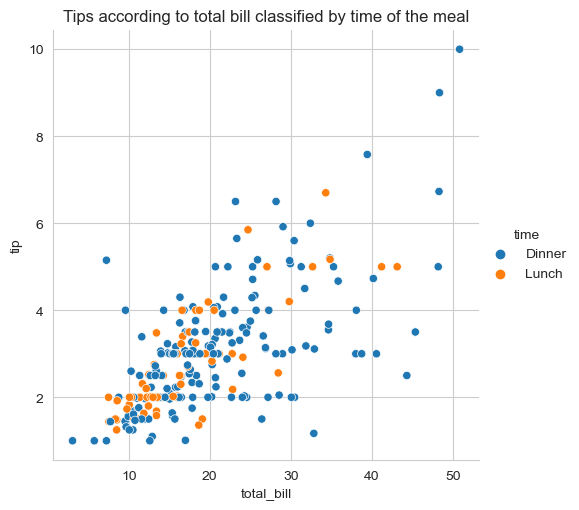

In [204]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='time')
plt.title('Tips according to total bill classified by time of the meal')

#### 6. To examine the tips given to the waiters based on the total bill and smooking status.

Text(0.5, 1.0, 'Tips according to total bill classified by smoking status')

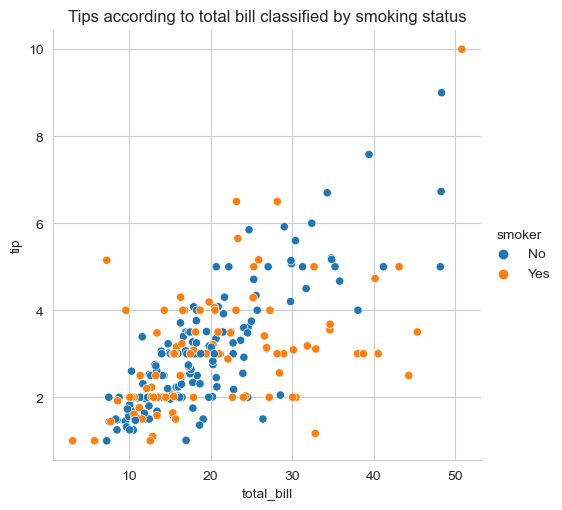

In [205]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.title('Tips according to total bill classified by smoking status')

#### Insights:
   - A strong positive relationship exist between total bill and tip offered according to time of the meal.
   - People are more likely to pay more bills and offers more tip during dinner.
   - This may be due to the fact that people are more likely to have time with families or loved ones during dinner
   - Smoking status of the customers also influences the total bill paid and the amount of tip offered.
   - However, non-smokers exhibit slightly higher likelihood of offering more tip than smokers

#### 7. To find the percentage tip for each total bill paid

In [206]:
# creating a new column
tips['percent_tip'] = 100 * (tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [207]:
tips['percent_tip'].mean()

16.080258172250463

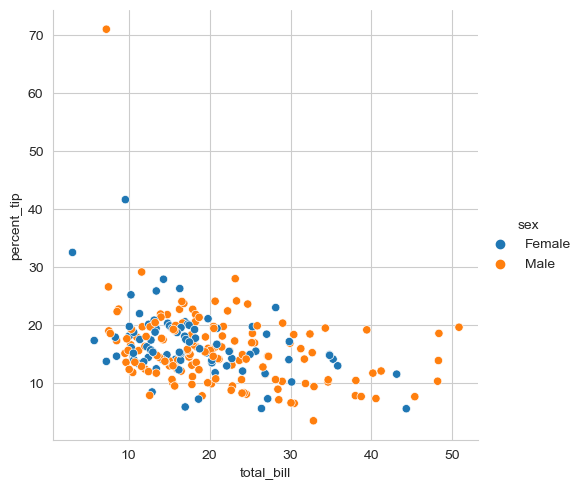

In [208]:
sns.relplot(data=tips, x='total_bill', y='percent_tip',hue='sex')

#### Insights:
   - The mean percentage tip for all total bill is $16.08
    

#### 8. To find the tips each according to day, sex, smoking status, and time.

In [138]:
tips.groupby('day').tip.sum().sort_values(ascending=False)

day
Sat     260.40
Sun     247.39
Thur    171.83
Fri      51.96
Name: tip, dtype: float64

Text(0.5, 1.0, 'Tip according to day')

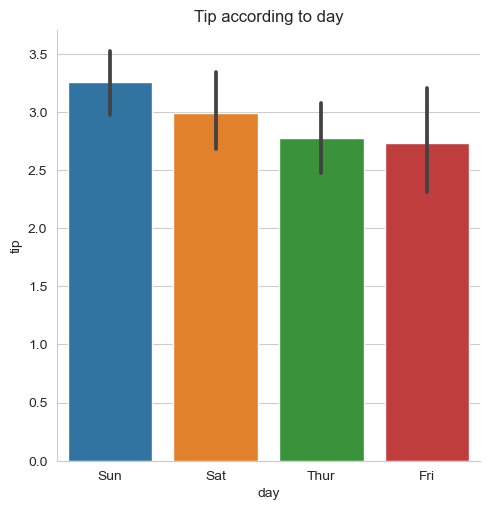

In [139]:
sns.catplot(data=tips, x='day', y='tip', kind='bar')
plt.title('Tip according to day')

In [141]:
tips.groupby('sex').tip.sum().sort_values(ascending=False)

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64

Text(0.5, 1.0, 'Tip by sex')

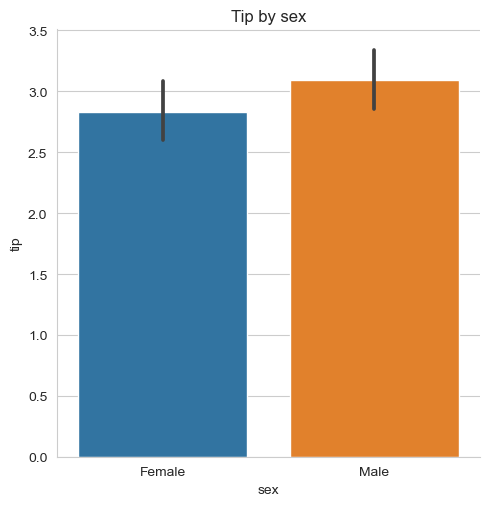

In [142]:
sns.catplot(data=tips, y='tip', x='sex', kind='bar')
plt.title('Tip by sex')

In [143]:
tips.groupby('smoker').tip.sum().sort_values(ascending=False)

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

Text(0.5, 1.0, 'Distribution of tip according to smoking status')

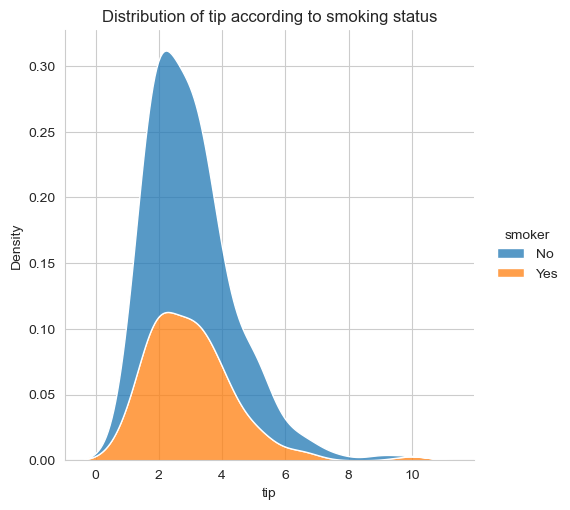

In [147]:
sns.displot(data=tips, x='tip', hue='smoker', multiple='stack', kind='kde',)
plt.title('Distribution of tip according to smoking status')

In [148]:
tips.groupby('time').tip.sum().sort_values(ascending=False)

time
Dinner    546.07
Lunch     185.51
Name: tip, dtype: float64

Text(0.5, 1.0, 'Distribution of tip by time of the meal')

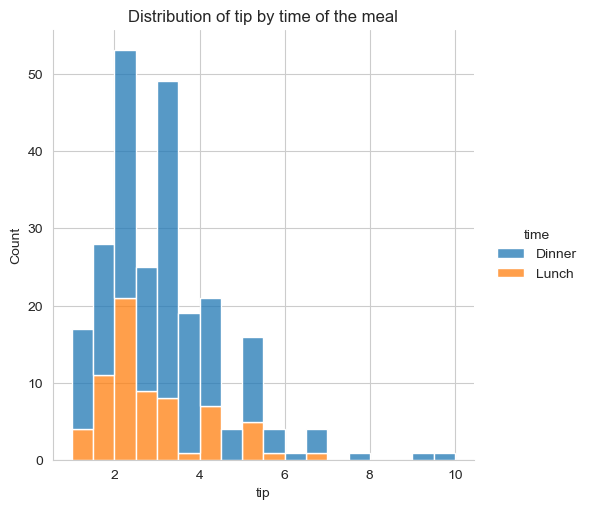

In [151]:
sns.displot(data=tips, x= 'tip', hue='time', multiple='stack')
plt.title('Distribution of tip by time of the meal')

#### Insights:
   - Out of the four (4) days a week considered namely Thursday, Friday, Saturday, and Sunday.
   - Saturdays has the highest sum of tip amounting to 260.40 dollars.This is followed by Sunday 247.39, Thursdays account 
     for 171.83 dollars, and Fridays account for only 51.96 dollars respectively.
   - Male customers offered almost twice as much tip than female customers. 
   - This means that male customers offers a sum of 485.07 dollars tip while females offered 246.51 dollars
   - Non-smokers offered more tips amounting to 451.77 dollars than smokers who offered a total of 279.81 dollars.
   - More tip were offered during dinner time (546.07 dollars) than during launch time (185.51 dolars).

#### 9. To develop waiter tips prediction model that will make predictions based on

In [170]:
tips_df = pd.read_csv('tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [171]:
# convert categorical variables into numeric
tips_df["sex"] = tips_df["sex"].map({"Female": 0, "Male": 1})
tips_df["smoker"] = tips_df["smoker"].map({"No": 0, "Yes": 1})
tips_df["day"] = tips_df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
tips_df["time"] = tips_df["time"].map({"Lunch": 0, "Dinner": 1})

In [172]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [175]:
# create independent and dependent variables

X = np.array(tips_df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']])
y = np.array(tips_df['tip'])

#### Split the dataset into training set and test set

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [181]:
X_train

array([[26.88,  1.  ,  0.  ,  3.  ,  1.  ,  4.  ],
       [32.68,  1.  ,  1.  ,  0.  ,  0.  ,  2.  ],
       [17.89,  1.  ,  1.  ,  3.  ,  1.  ,  2.  ],
       ...,
       [10.65,  0.  ,  0.  ,  0.  ,  0.  ,  2.  ],
       [32.4 ,  1.  ,  0.  ,  3.  ,  1.  ,  4.  ],
       [ 7.25,  1.  ,  1.  ,  3.  ,  1.  ,  2.  ]])

In [179]:
X_test

array([[17.59,  1.  ,  0.  ,  2.  ,  1.  ,  3.  ],
       [18.29,  1.  ,  1.  ,  2.  ,  1.  ,  4.  ],
       [19.49,  1.  ,  0.  ,  3.  ,  1.  ,  2.  ],
       [ 7.25,  0.  ,  0.  ,  2.  ,  1.  ,  1.  ],
       [16.27,  0.  ,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 5.75,  0.  ,  1.  ,  1.  ,  1.  ,  2.  ],
       [17.92,  1.  ,  1.  ,  2.  ,  1.  ,  2.  ],
       [23.33,  1.  ,  1.  ,  3.  ,  1.  ,  2.  ],
       [18.15,  0.  ,  1.  ,  3.  ,  1.  ,  3.  ],
       [34.65,  1.  ,  1.  ,  3.  ,  1.  ,  4.  ],
       [25.28,  0.  ,  1.  ,  2.  ,  1.  ,  2.  ],
       [25.21,  1.  ,  1.  ,  2.  ,  1.  ,  2.  ],
       [14.07,  1.  ,  0.  ,  3.  ,  1.  ,  2.  ],
       [13.  ,  0.  ,  1.  ,  0.  ,  0.  ,  2.  ],
       [13.42,  1.  ,  1.  ,  1.  ,  0.  ,  2.  ],
       [30.4 ,  1.  ,  0.  ,  3.  ,  1.  ,  4.  ],
       [ 8.35,  0.  ,  0.  ,  0.  ,  0.  ,  2.  ],
       [14.  ,  1.  ,  0.  ,  2.  ,  1.  ,  2.  ],
       [18.78,  0.  ,  0.  ,  0.  ,  1.  ,  2.  ],
       [23.1 ,  1.  ,  1.  ,  3

In [182]:
y_train

array([ 3.12,  5.  ,  2.  ,  4.06,  5.  ,  4.  ,  1.5 ,  5.07,  2.45,
        2.5 ,  2.5 ,  4.  ,  3.16,  3.  ,  3.75,  3.09,  3.  ,  3.23,
        1.17,  1.67,  3.  ,  3.  ,  1.25,  3.61,  4.  ,  2.  ,  1.36,
        5.2 ,  2.47,  2.  ,  3.25,  1.25,  1.5 ,  2.24,  3.  ,  3.31,
        2.74,  3.18,  1.45,  1.44,  3.21,  3.  ,  3.55,  6.5 ,  3.35,
        3.5 ,  2.18,  4.34,  4.67,  3.  ,  2.6 ,  2.  ,  2.01,  1.5 ,
        2.  ,  1.71,  2.  ,  3.18,  1.48,  2.54,  3.02,  2.  ,  2.5 ,
        3.48,  4.08,  2.  ,  5.  ,  2.24,  5.92,  3.5 , 10.  ,  1.98,
        1.5 ,  2.  ,  3.5 ,  6.73,  2.  ,  3.  ,  1.32,  4.19,  2.75,
        2.  ,  4.  ,  3.41,  3.  ,  2.  ,  4.3 ,  2.3 ,  1.47,  2.55,
        1.01,  3.25,  4.73,  2.09,  3.  ,  2.05,  5.17,  2.  ,  6.7 ,
        7.58,  1.1 ,  5.  ,  3.  ,  2.5 ,  2.83,  2.  ,  1.75,  2.  ,
        2.01,  2.03,  1.68,  2.72,  3.  ,  3.  ,  2.  ,  3.5 ,  3.5 ,
        2.5 ,  5.  ,  2.92,  2.5 ,  3.6 ,  1.5 ,  2.  ,  3.15,  1.66,
        2.31,  4.  ,

In [183]:
y_test

array([2.64, 3.76, 3.51, 1.  , 2.5 , 1.  , 3.08, 5.65, 3.5 , 3.68, 5.  ,
       4.29, 2.5 , 2.  , 1.58, 5.6 , 1.5 , 3.  , 3.  , 4.  , 2.  , 4.08,
       2.  , 1.96, 2.  , 2.5 , 2.2 , 4.2 , 4.71, 2.23, 2.2 , 2.52, 1.57,
       1.61, 3.  , 2.61, 3.07, 2.  , 9.  , 3.  , 1.92, 1.8 , 3.  , 5.14,
       2.23, 3.5 , 3.76, 3.92, 3.  ])

#### Model the linear regression on training set data

In [184]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Predicting the model using test set data

In [185]:
y_pred = regressor.predict(X_test)
y_pred

array([2.80225875, 3.06027065, 2.78492697, 1.52790345, 2.64539765,
       1.57024983, 2.61390086, 3.10346052, 2.8915828 , 4.4841421 ,
       3.26460241, 3.23592214, 2.32246396, 2.33843409, 2.37951311,
       4.13062518, 1.95078706, 2.28854129, 2.66320381, 3.29123542,
       3.85714945, 2.90169971, 2.57170242, 2.40522948, 2.35924248,
       2.62854004, 2.27200326, 4.61061314, 3.69461301, 2.46227453,
       2.37353624, 2.30318046, 2.43765309, 2.01117408, 2.68253663,
       2.28715027, 2.76865157, 2.11973111, 5.63255751, 2.83716855,
       1.75913905, 2.2989142 , 2.63102521, 4.3138035 , 2.19632993,
       2.80001448, 2.65032047, 2.9632568 , 2.78059711])

In [186]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[22.75, 1, 1, 2, 1, 4]])
regressor.predict(features)

array([3.44082139])

#### Model evaluation

In [188]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [189]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.8365584111683403


In [190]:
# precision score
regressor.score(X_test, y_test)

0.583089791406904

#### Insights:
   - In this linear regression model, tip is dependent on total_bill, sex, smoker, day, time, and size.
   - Hence, our dependent variable is tip offered, and our independent variables are total bill, sex, smoker, day, time, 
      and size respectively.
   - since our independent variables are all categorical variables except total bill and size, we converted each categorical 
      variable to numeric values.
   - sex: 0 = Female, 1 = Male
   - smoker: 0 = No, 1 = Yes
   - day: 0 = Thur, 1 = Fri, 2 = Sat, and 3 = Sun
   - time: 0 = Lunch, 1 = Dinner
    
   - 80% of the dataset was used for training and 20% of the data was used for testing
   - The model Mean Squared Error is 0.84. This imply the model measures 84% of the variability or difference between 
      the actual tip offered and predicted tip with the model accuracy score of 0.58

#### Recommendations
   - Customer satisfaction survey should be carried out to ascertain the following:
        a. the possible behaviour that could increase total bill and more tip since they are correlated
        b. whether or not male customers are likely to pay more bills and offer tip if they were served by a female.
   - Make more promotional offers during launch time to multiply the rate of sales during this time
   - More efforts should be made to double the customers inflow during weekend (Sat and Sun) since more customers 
        spend time out during these days and special promotional offers to made only on this days to attract more customers.
   - Improve on general service delivery to attract more customers.
   - A multiple linear regression machine learning model should be applied to the same dataset using similar features
        to compare to their performances.